In [27]:
import numpy as np

class LogisticRegression:
    def __init__(self, alpha=1e-3,lambda_=0.01, iters=1000):
        self.w = None
        self.b = None
        self.alpha = alpha
        self.iters = iters
        self.lambda_ = lambda_  # regularization strength

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _gradient(self, x, y, y_pred):
        err = y_pred - y
        dw = (1 / self.m) * np.dot(x.T, err) + (self.lambda_ / self.m) * self.w
        db = (1 / self.m) * np.sum(err)
        return dw, db

    def _update_param(self, dw, db):
        self.w -= self.alpha * dw
        self.b -= self.alpha * db

    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        return self._sigmoid(z)

    def fit(self, x, y):
        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        for _ in range(self.iters):
            y_pred = self.predict(x)
            dw, db = self._gradient(x, y, y_pred)
            self._update_param(dw, db)

    def finalpred(self, x):
        return (self.predict(x) >= 0.5).astype(int)


In [28]:
#no.of hours study,concentrattion -> pass or fail
X = np.array([[1,5], [2,10], [3,2], [4,5], [5,10], [6,1], [7,3], [8,6]])
y = np.array([0, 1, 0, 0, 1, 0, 1, 1])

model=LogisticRegression(alpha=0.1,iters=1000)


In [29]:
model.fit(X,y)

In [30]:
y_pred=model.finalpred([[1,3],[5,5],[6,7],[1,10]])

In [31]:
print(y_pred)

[0 1 1 1]


In [32]:
print(model.finalpred([[10,1],[2,5],[9,10]]))

[1 0 1]


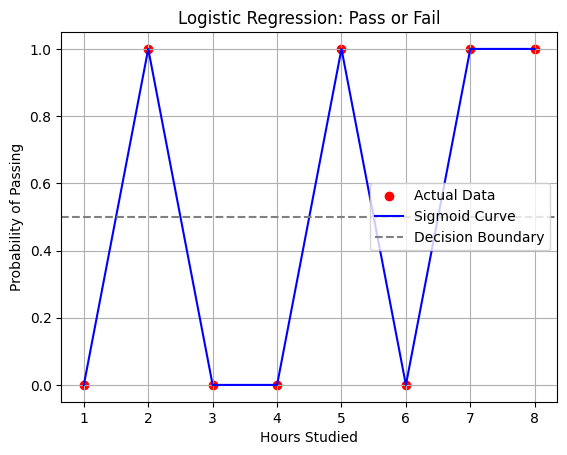

In [33]:
import matplotlib.pyplot as plt

# Use only the first feature (hours of study) for visualization
x_single = X[:, 0]  # Hours studied
model.fit(X, y)
y_pred_prob = model.predict(X)
y_pred = model.finalpred(X)

# Sort the data by x for a cleaner curve
sorted_indices = np.argsort(x_single)
x_sorted = x_single[sorted_indices]
y_sorted = y_pred[sorted_indices]

plt.scatter(x_single, y, color='red', label='Actual Data')
plt.plot(x_sorted, y_sorted, color='blue', label='Sigmoid Curve')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary')
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Logistic Regression: Pass or Fail")
plt.legend()
plt.grid(True)
plt.show()
